In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl


import mglearn
import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()    
# 한글폰트가 기본적으로 없다.  그래서 따로 등록해서 사용하면 됨
font_name
#(c\windows\fonts  가 기본폰트)

plt.rc('font', family=font_name)

# - 마이너스 표시도 깨진다.
mpl.rcParams["axes.unicode_minus"]=False    #마이너스를 문자로 쓰지 않고 숫자로 쓰겠다. 라는 뜻


# import mglearn

from sklearn.model_selection import train_test_split

# Decision Tree
    의사결정 나무 알고리즘
    
    20고개 게임을 생각해볼 수 있다. 
    
            날개가 있냐 
              /   \
      날수 있냐    지느러미가 있냐
        /  \              /  \
    독수리  펭귄       돌고래  곰
    
    
    이런식으로 계속 진행해나가는 방법을 의미한다. 
    
    장점
        전처리 할 필요가 없다.
        알고리즘 설명하기 간단하다. (스무고개 방식이라서)
        이진분류, 또는 연속데이터 등 특성에 상관없이 사용가능
        스케일이 다르더라도 사용 가능
    
    단점
        가지치기를 해도 과적합 되는것을 막기가 힘들다. - 훈련데이터에 집중
        
### Graphviz
    일반적인그래프와는 달리 특수한 목적에 사용하는 그래프이다.
    
    밑에 사이트에서 설치해줘야한다.
    - 설치
        http://www.graphviz.org
        2.38 Stable Release

        graphviz-2.38.msi

        실행 후 All next 
    
    - python 설치
    
        pip install graphviz

### 복잡도 제어 : prunning
    - 사전 가지치기
    - 사후 가지치기
    - sklearn에서는 사후 가지치기만 지원
    
    
    - 매개변수
        max_depth 
        max_leaf_nodes    : 리프 노드의 최대 갯수를 지정
        min_samples_leaf  : 리프 노드가 되기 위한 최소한의 샘플 갯수
        min_samples_split : 노드가 분기할 수 있는 최소 샘플 갯수
        

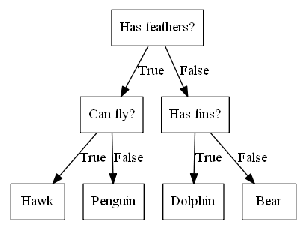

In [11]:
# 운영체제 관련된걸 사용하기 위함
import os

# 환경 변수경로에 추가
os.environ["PATH"] += os.pathsep + "C:/Program Files (x86)/Graphviz2.38/bin"
#os.pathsep : 지금까지의 설정뒤에 세미콜론을 찍어주기 위한 속성

#설치확인 그림
mglearn.plots.plot_animal_tree()

의사결정 샘플 중 mglearn에서 제공하는게 있다.

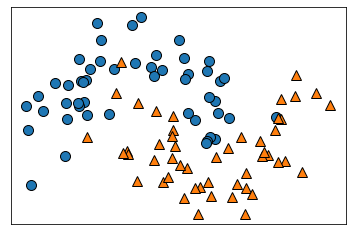

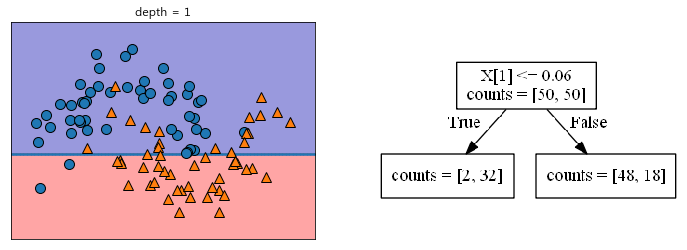

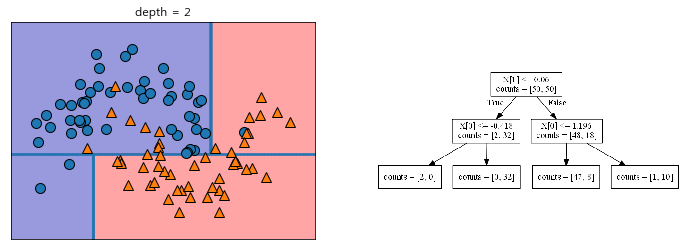

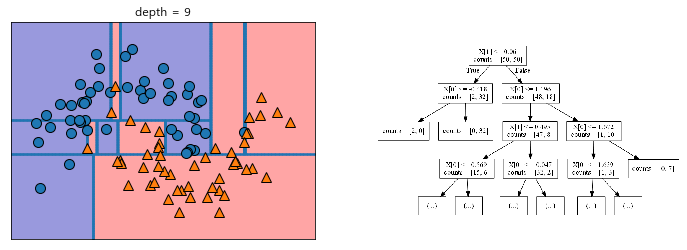

In [3]:
# 샘플 
# 의사결정이 어떻게 진행되는지 그래프로 나타내준다. 
mglearn.plots.plot_tree_progressive()


    절때 직선으로 분류할 수 없다.
    우리가 하던 방식대로 하면 곡선으로 나온다던지 그랬을 것. 쉽지 않다.
    그래서 의사결정트리 처럼 단계별로 구분해준다면 쩔지 않을까
    
    depth = 1 : 첫번째 질문
        입력된 값 중 0.06기준으로 맞냐 틀리냐
        
    depth = 2 : 두번째 질문
        ..
        ..
        ..
        
    이렇게 총9 번 정도를 해서 복잡한 관계를 분류할 수 있다. 
    이런 알고리즘이 의사결정트리 알고리즘
    
    
    그런데 이런건 깊게 훈련하면 훈련용 데이터는 정답률이 너무 높아진다. 거의 100%로 이루어짐
    과대적합이 되는데
    복잡도를 그래서 제어 해야한다.
    
    이 알고리즘의 제어는 '어디까지 가지를 쳐야하나' 라는 것을 잘 판단해야한다.
    적당하게 가지를 치는게 아주 중요 = Prunning (가지치기)
    
    그래서 이걸 찾는 것이 이 알고리즘의 큰 관건
    
### 복잡도 제어 : prunning
    가지치기
        - 사전 가지치기 : 미리 훈련전 depth 몇까지 할건지
            성능이 좋겠지
        - 사후 가지치기 : 훈련이 끝난 후 가지를 친다.
            성능 부분에선 떨어진다. 
            다만 내가 보고 나서 정확히 더 구분할 수 있다는것에 장점이 있다.
        
    하지만 sklearn에서는 사후 가지치기만 지원한다.
    그래서 사전가지치기는 할 수 없다. 
    이 경우에선 R은 잘 되어있다. 만약 의사결정트리만 쓰는 경우면 R을 쓰는 것도 방법이다.
    
        
    

In [2]:
# 샘플 : 유방암 데이터 셋
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()


# 훈련용 테스트용 구분
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, 
                                                    random_state=42)

In [4]:
# 알고리즘 선택  : DecisionTreeClassifier
# 여기서 Hyper param을 정할 수 있다. (가지)
# random_state도 지정해줄 수 있음.
# max_depth : 가지 수 - 이것으로 성능이 갈린다.
tree = DecisionTreeClassifier(random_state=0, max_depth = 4)


# 훈련
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

    다른 알고리즘에 비해서 조정할 값들이 많다.
    성능 조절할 수 있는 방법들이니 찾아보면 된다.

In [9]:
print("훈련 정확도 : ", tree.score(X_train, y_train))

훈련 정확도 :  0.9882629107981221


    가지만 높이면 충분히 100%까지 나온다
    다만 이렇게 하면 훈련용만 완벽해지므로 과대적합이 되어 의미가 없어진다.
    중요한건 테스트 정확도이다.

In [10]:
print("테스트 정확도 : ", tree.score(X_test, y_test))

테스트 정확도 :  0.951048951048951


    약간 낮지만 이 정도면 아주 준수하다.
    그 전에 했던 것들은 이정도 정확도는 나오지 않았다. 

In [6]:
# 이 결과를 그래프로 해보자
# 얼마나 graphviz가 유명했으면 sklearn에도 있을까
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="data/tree.dot", class_names=["음성", "양성"],
               feature_names=cancer.feature_names, impurity=False, filled=True) 
# graphviz 형식으로 저장하기
# 데이터
# out_file : 저장위치 (dot이 graphviz의 파일 형식이다.)
# class : 네임으로 할것
# feature : ?
# impurity : 불순물 제거 

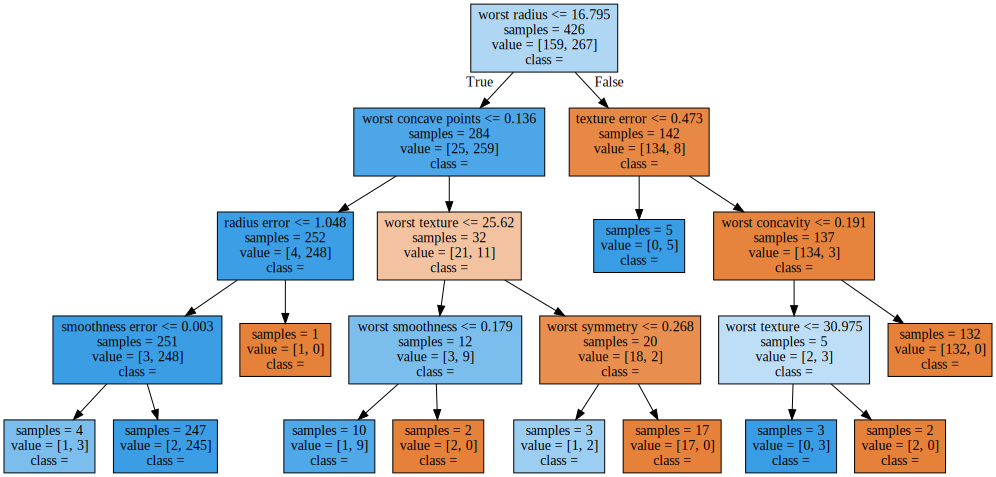

In [12]:
import graphviz

# 불러오기
# 혹시 실행시 에러가 발생하면 tree.dot 파일 인코딩을 ANSI로 바꿔라
with open("data/tree.dot") as f :
    dot_graph = f.read()
    

# 위에서 path 실행해야 graphviz가 실행이 된다. 
display(graphviz.Source(dot_graph))


    최초 worst radius를 16.795기준으로 구분하는게 나을거 같다고 판단해서
    depth 1이 되었다.
    
    나머지도 마찬가지 
    
    그렇게 해서 depth5까지 만들어짐
    
    

In [13]:
#우리가 가지를 만들지 않고 훈련을 시켰을 땐
# tree = DecisionTreeClassifier(random_state=0, max_depth = 4)
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("훈련 정확도 : ", tree.score(X_train, y_train))
print("테스트 정확도 : ", tree.score(X_test, y_test))

훈련 정확도 :  1.0
테스트 정확도 :  0.9370629370629371


    가지수를 정하지 않으면 끝까지 해버리기 때문에 훈련정확도가 100이 나온다.
    대신 테스트 정확도도 떨어지기 때문에 이는 전형적인 과적합이다. 
    
    

### 특성중요도

In [14]:
print(tree.feature_importances_) 
# 무엇이 가장 중요한 항목인지 보여줌

[0.         0.00752597 0.         0.         0.00903116 0.
 0.00752597 0.         0.         0.         0.00975731 0.04630969
 0.         0.00238745 0.00231135 0.         0.         0.
 0.         0.00668975 0.69546322 0.05383211 0.         0.01354675
 0.         0.         0.01740312 0.11684357 0.01137258 0.        ]


    0은 별로 안중요한 데이터이다.
    1에 가까워질 수록 중요한 데이터    

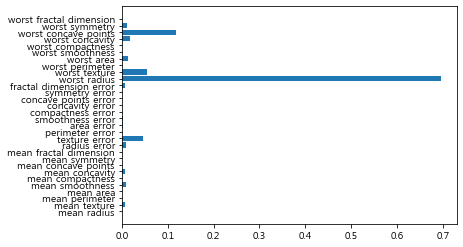

In [15]:
# 모델을 넘겨주면 그 중에 중요항목을 뽑아내주는 그래프 함수를 생성
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align="center")
    plt.yticks(np.arange(n_features), cancer.feature_names)
    

plot_feature_importances_cancer(tree)

    아까 위에 의사결정트리에서 worst radius를 제일 1순위로 구분했었다.
    그 이유는 바로 위 그래프를 보면 worst radius가 가장 영향력 있는 항목을 뜨기 때문이였다.
    
    0인 것은 아예 사용을 안했는데 안중요하다고 빼면 안된다.
    이런것도 고려해서 사용해야 한다.
    
    R 같은 경우에는 가지를 몇개까지 치는게 좋을까를 보여주는 지표가 있다. 

### 의사결정나무.pdf
    
    기계가 학습하는 내용 과정을 소개
    아이가 배우는 과정이랑 비교
    
    
    Entropy ( 0 <= entropy <= 1 )
    
        동전이 있다면 이걸 던지면 불확실성이 있다. 
        
        근데 앞뒤가 다 그림이라면 그림이 나올 확률은 100%가 된다. 불확실성이 없다고 표현할 수 있다.
        
        동전이 찌그러져서 그림이 90%확률로 나오게 하더라도 불확실성이 있다.
        
        이것을 Entropy로 표현하는데
        
        1. 불확실 = 0
        2. 확실 = 1
        3. 불확실 = 0.9
        
        이 값들을 Entropy라고 한다.  어떤게 가장 불확실하고 확실하고를 나눌 수 있음.
        이진 분류는 이렇게 된다.
        
        
        만약 다중분류라면 
        4개중에서 하나를 뽑는다면 Entropy 최댓값은 0~2이 됨
        8개면  2^3 이니까 최댓값 3
        16개면  2^4 이니까 최댓값 4 ...???
            
        Entropy 계산할 때 쓰는 주 공식이 섀넌의 Entropy공식이다.     
        
        

### Extrapolation(외삽)  외삽??
    훈련데이터의 범위 밖에 포인트에 대해서는 예측할 수 없다. 
   

In [18]:
# 샘플 데이터  ram_price.csv - 램가격에 대한 데이터

# ram_prices = pd.read_csv("data/ram_price.csv")
ram_prices = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH, "ram_price.csv"))
print(mglearn.datasets.DATA_PATH)  # mglearn sample data 위치

ram_prices

C:\Users\user\Anaconda3\lib\site-packages\mglearn\data


,Unnamed: 0,date,price
0,0,1957.00,4.110418e+08
1,1,1959.00,6.794772e+07
2,2,1960.00,5.242880e+06
3,3,1965.00,2.642412e+06
4,4,1970.00,7.340030e+05
...,...,...,...
328,328,2015.58,4.500000e-03
329,329,2015.67,4.300000e-03
330,330,2015.75,4.200000e-03
331,331,2015.83,3.800000e-03


Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.


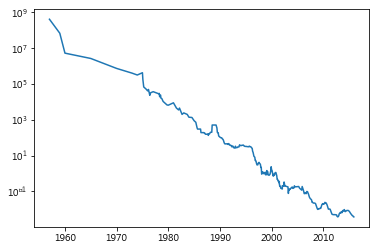

In [19]:
#시계열 그래프를 그리는 함수 
plt.semilogy(ram_prices.date, ram_prices.price)

In [20]:
#  2000년 전까지의 데이터로부터 2000년 이후 가격 예측
from sklearn.tree import DecisionTreeRegressor  #트리 알고리즘으로 회귀분석
from sklearn.linear_model import LinearRegression  # 선형모델로 회귀분석

# 둘 사이를 비교해보자 어느것이 좋은지 

In [22]:
# 훈련용 테스트용 구분
data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]

In [25]:
X_train = data_train.date[:, np.newaxis]  #날짜를 2차원으로 변경?
y_train = data_train.price

In [26]:
# 트리 알고리즘으로 훈련 시켜보기
tree = DecisionTreeRegressor().fit(X_train, y_train)

# 선형으로 훈련시켜보기
linear = LinearRegression().fit(X_train, y_train)

In [27]:
print("tree훈련 정확도 : ", tree.score(X_train, y_train))
print("linear훈련 정확도 : ", linear.score(X_train, y_train))

tree훈련 정확도 :  1.0
linear훈련 정확도 :  0.12149140276372049


In [28]:
# 예측은 전체 기간에 대해서 수행 
X_all = ram_prices.date[:, np.newaxis]

pred_tree = tree.predict(X_all)
pred_linear = linear.predict(X_all)

Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.


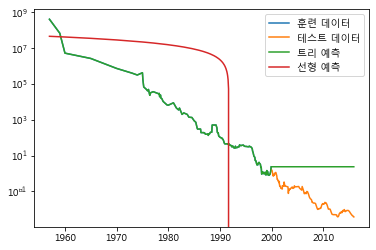

In [33]:
# 예측 결과 시각화 

plt.semilogy(data_train.date, data_train.price, label="훈련 데이터")
plt.semilogy(data_test.date, data_test.price, label="테스트 데이터")
plt.semilogy(ram_prices.date, pred_tree, label="트리 예측")
plt.semilogy(ram_prices.date, pred_linear, label="선형 예측")
plt.legend() #이름 표시 

    트리는 훈련받은 데이터만 예측을 하는거지 그 이후 데이터는 예측하지 못한다.
    
    선형은 ......???????
    훈련데이터도 엉망이고 예측도 엉망이다.    
    초록 그래프(훈련데이터)를 보면 사실 선형이 아니다. - 굴곡이 심하니까 
    스케일을 맞춰줘야하는데 그걸 안맞췄기 때문에 선형예측이 힘들어짐
    
    그래서 스케일을 맞춰주기 위해서 y_train 값을 log를 씌어준다.  X_train이랑 값이 너무 차이나서
    
    
    

In [36]:
X_train = data_train.date[:, np.newaxis]
y_train = np.log(data_train.price)  # 선형때문에 스케일 적용시키기 위해 log

# 선형 다시 훈련
linear = LinearRegression().fit(X_train, y_train)

# 로그로 줄였으니 다시 늘려야됨
pred_linear = np.exp(linear.predict(X_all))

Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.


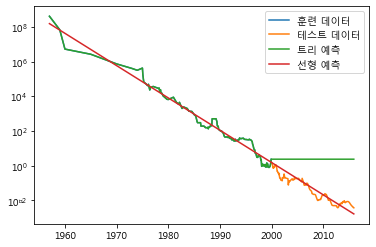

In [37]:
# 그래프 다시 그리기
plt.semilogy(data_train.date, data_train.price, label="훈련 데이터")
plt.semilogy(data_test.date, data_test.price, label="테스트 데이터")
plt.semilogy(ram_prices.date, pred_tree, label="트리 예측")
plt.semilogy(ram_prices.date, pred_linear, label="선형 예측")
plt.legend() #이름 표시 

    그래프 결과 :
    
    약간의 오차가 있지만 그래도 아까에 비해서는 훨씬 맞게 회귀선이 생겼다. 
    
    트리알고리즘은 그래서 시계열 데이터에는 맞지않다.
    
    아마 가격이오를까 내려갈까 정도는 맞출 수 있겠지만
    
    가격이 몇일까 예측까지 되지는 않는다. 
    
    이를 통하여 의사결정트리는 전처리가 필요없다는 것도 알게 됨.
    
    

## 사례 1 : iris 데이터 활용

In [38]:
# 데이터 준비하기
from sklearn import datasets

iris = datasets.load_iris()
df = pd.DataFrame(iris.data)
df.columns = iris.feature_names
df["result"] = iris.target

In [40]:
X = iris.data[:, [2,3]]
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [45]:
#scale 조정
from sklearn.preprocessing import StandardScaler
sc = StandardScaler().fit(X_train)

X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [46]:
# 훈련
model = DecisionTreeClassifier(random_state=0, criterion = "entropy", max_depth=3).fit(X_train_std,y_train)

In [49]:
# 정확도
print("훈련 정확도 : ", model.score(X_train_std, y_train))
print("테스트 정확도 : ", model.score(X_test_std, y_test))

훈련 정확도 :  0.9821428571428571
테스트 정확도 :  0.9736842105263158


    상당히 좋은 성능이쥬

## 사례2 : 서울지역 동 분류
    서울 지역(구)의 경도와 위도를 사용하여, 임의로 입력된 지역(동)을 강동, 강서, 강남, 강북으로 분류

In [51]:
# 샘플데이터 (구)
district_dict_list = [
            {'district': 'Gangseo-gu', 'latitude': 37.551000, 'longitude': 126.849500, 'label':'Gangseo'},
            {'district': 'Yangcheon-gu', 'latitude': 37.52424, 'longitude': 126.855396, 'label':'Gangseo'},
            {'district': 'Guro-gu', 'latitude': 37.4954, 'longitude': 126.8874, 'label':'Gangseo'},
            {'district': 'Geumcheon-gu', 'latitude': 37.4519, 'longitude': 126.9020, 'label':'Gangseo'},
            {'district': 'Mapo-gu', 'latitude': 37.560229, 'longitude': 126.908728, 'label':'Gangseo'},
            
            {'district': 'Gwanak-gu', 'latitude': 37.487517, 'longitude': 126.915065, 'label':'Gangnam'},
            {'district': 'Dongjak-gu', 'latitude': 37.5124, 'longitude': 126.9393, 'label':'Gangnam'},
            {'district': 'Seocho-gu', 'latitude': 37.4837, 'longitude': 127.0324, 'label':'Gangnam'},
            {'district': 'Gangnam-gu', 'latitude': 37.5172, 'longitude': 127.0473, 'label':'Gangnam'},
            {'district': 'Songpa-gu', 'latitude': 37.503510, 'longitude': 127.117898, 'label':'Gangnam'},
   
            {'district': 'Yongsan-gu', 'latitude': 37.532561, 'longitude': 127.008605, 'label':'Gangbuk'},
            {'district': 'Jongro-gu', 'latitude': 37.5730, 'longitude': 126.9794, 'label':'Gangbuk'},
            {'district': 'Seongbuk-gu', 'latitude': 37.603979, 'longitude': 127.056344, 'label':'Gangbuk'},
            {'district': 'Nowon-gu', 'latitude': 37.6542, 'longitude': 127.0568, 'label':'Gangbuk'},
            {'district': 'Dobong-gu', 'latitude': 37.6688, 'longitude': 127.0471, 'label':'Gangbuk'},
     
            {'district': 'Seongdong-gu', 'latitude': 37.557340, 'longitude': 127.041667, 'label':'Gangdong'},
            {'district': 'Dongdaemun-gu', 'latitude': 37.575759, 'longitude': 127.025288, 'label':'Gangdong'},
            {'district': 'Gwangjin-gu', 'latitude': 37.557562, 'longitude': 127.083467, 'label':'Gangdong'},
            {'district': 'Gangdong-gu', 'latitude': 37.554194, 'longitude': 127.151405, 'label':'Gangdong'},
            {'district': 'Jungrang-gu', 'latitude': 37.593684, 'longitude': 127.090384, 'label':'Gangdong'}
         ]

In [52]:
train_df = pd.DataFrame(district_dict_list)
train_df = train_df[["district", "longitude", "latitude", "label"]]
train_df

,district,longitude,latitude,label
0,Gangseo-gu,126.849500,37.551000,Gangseo
1,Yangcheon-gu,126.855396,37.524240,Gangseo
2,Guro-gu,126.887400,37.495400,Gangseo
3,Geumcheon-gu,126.902000,37.451900,Gangseo
4,Mapo-gu,126.908728,37.560229,Gangseo
5,Gwanak-gu,126.915065,37.487517,Gangnam
6,Dongjak-gu,126.939300,37.512400,Gangnam
7,Seocho-gu,127.032400,37.483700,Gangnam
8,Gangnam-gu,127.047300,37.517200,Gangnam
9,Songpa-gu,127.117898,37.503510,Gangnam


In [53]:
# 동
dong_dict_list = [
            {'dong': 'Gaebong-dong', 'latitude': 37.489853, 'longitude': 126.854547, 'label':'Gangseo'},
            {'dong': 'Gochuk-dong', 'latitude': 37.501394, 'longitude': 126.859245, 'label':'Gangseo'},
            {'dong': 'Hwagok-dong', 'latitude': 37.537759, 'longitude': 126.847951, 'label':'Gangseo'},
            {'dong': 'Banghwa-dong', 'latitude': 37.575817, 'longitude': 126.815719, 'label':'Gangseo'},
            {'dong': 'Sangam-dong', 'latitude': 37.577039, 'longitude': 126.891620, 'label':'Gangseo'},
            
            {'dong': 'Nonhyun-dong', 'latitude': 37.508838, 'longitude': 127.030720, 'label':'Gangnam'},
            {'dong': 'Daechi-dong', 'latitude': 37.501163, 'longitude': 127.057193, 'label':'Gangnam'},
            {'dong': 'Seocho-dong', 'latitude': 37.486401, 'longitude': 127.018281, 'label':'Gangnam'},
            {'dong': 'Bangbae-dong', 'latitude': 37.483279, 'longitude': 126.988194, 'label':'Gangnam'},
            {'dong': 'Dogok-dong', 'latitude': 37.492896, 'longitude': 127.043159, 'label':'Gangnam'},
    
            {'dong': 'Pyoungchang-dong', 'latitude': 37.612129, 'longitude': 126.975724, 'label':'Gangbuk'},
            {'dong': 'Sungbuk-dong', 'latitude': 37.597916, 'longitude': 126.998067, 'label':'Gangbuk'},
            {'dong': 'Ssangmoon-dong', 'latitude': 37.648094, 'longitude': 127.030421, 'label':'Gangbuk'},
            {'dong': 'Ui-dong', 'latitude': 37.648446, 'longitude': 127.011396, 'label':'Gangbuk'},
            {'dong': 'Samcheong-dong', 'latitude': 37.591109, 'longitude': 126.980488, 'label':'Gangbuk'},
    
            {'dong': 'Hwayang-dong', 'latitude': 37.544234, 'longitude': 127.071648, 'label':'Gangdong'},
            {'dong': 'Gui-dong', 'latitude': 37.543757, 'longitude': 127.086803, 'label':'Gangdong'},
            {'dong': 'Neung-dong', 'latitude': 37.553102, 'longitude': 127.080248, 'label':'Gangdong'},
            {'dong': 'Amsa-dong', 'latitude': 37.552370, 'longitude': 127.127124, 'label':'Gangdong'},
            {'dong': 'Chunho-dong', 'latitude': 37.547436, 'longitude': 127.137382, 'label':'Gangdong'}
         ]

In [55]:
test_df = pd.DataFrame(dong_dict_list)
test_df = test_df[["dong", "longitude", "latitude", "label"]]
test_df

,dong,longitude,latitude,label
0,Gaebong-dong,126.854547,37.489853,Gangseo
1,Gochuk-dong,126.859245,37.501394,Gangseo
2,Hwagok-dong,126.847951,37.537759,Gangseo
3,Banghwa-dong,126.815719,37.575817,Gangseo
4,Sangam-dong,126.891620,37.577039,Gangseo
5,Nonhyun-dong,127.030720,37.508838,Gangnam
6,Daechi-dong,127.057193,37.501163,Gangnam
7,Seocho-dong,127.018281,37.486401,Gangnam
8,Bangbae-dong,126.988194,37.483279,Gangnam
9,Dogok-dong,127.043159,37.492896,Gangnam


In [56]:
# 현재 데이터 개수 확인
train_df.label.value_counts()
test_df.label.value_counts()

Gangbuk     5
Gangseo     5
Gangnam     5
Gangdong    5
Name: label, dtype: int64

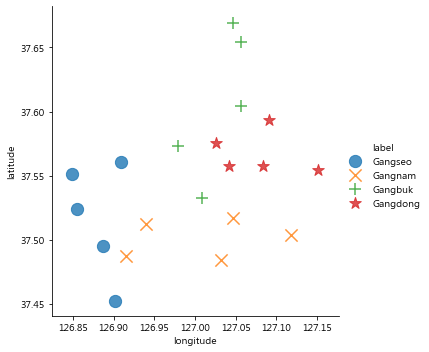

In [59]:
# t시각화

sns.lmplot("longitude", "latitude",data=train_df, markers=["o", "x", "+", "*"], hue="label",
          fit_reg=False, scatter_kws={"s":150})
#hue : label별로 색깔 나눌때
#fit_reg : 회귀선   False :안그림

In [63]:
# 전처리
# 훈련시키기 위해선 다듬기를 해준다. 
# 구이름, 동이름은 사실 필요없다. 삭제하도록 한다.  (숫자로 들어가는 값은 필요가 없다.)

train_df.drop(["district"], axis=1, inplace=True)  
test_df.drop(["dong"], axis=1, inplace=True)  

In [65]:
train_df.head()
test_df.head()

,longitude,latitude,label
0,126.854547,37.489853,Gangseo
1,126.859245,37.501394,Gangseo
2,126.847951,37.537759,Gangseo
3,126.815719,37.575817,Gangseo
4,126.891620,37.577039,Gangseo


    훈련데이터로 하기 위해 위도경도를 X, label을 y로 나눠준다.

In [67]:
# 훈련용 
X_train = train_df[["longitude", "latitude"]]
y_train = train_df[["label"]]

# 테스트용 
X_test = test_df[["longitude", "latitude"]]
y_test = test_df[["label"]]

In [68]:
from sklearn import preprocessing

In [71]:
# y_train 수정(label을 숫자값으로?)
le = preprocessing.LabelEncoder()
y_encode = le.fit_transform(y_train)
y_encode

C:\Users\user\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

In [73]:
# 훈련시키기
clf = DecisionTreeClassifier(random_state = 35).fit(X_train, y_encode)
clf

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=35, splitter='best')

In [75]:
def display_decision_surface(clf, X, y):
    x_min = X.longitude.min() - 0.01
    x_max = X.longitude.max() + 0.01
    y_min = X.latitude.min() - 0.01
    y_max = X.latitude.max() + 0.01
    
    n_classes = len(le.classes_)
    plot_colors = "rywb"
    plot_step = 0.001
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)
    
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X.loc[idx].longitude, X.loc[idx].latitude, c=color, label=le.classes_[i], cmap=plt.cm.RdYlBu, \
                   edgecolor="black", s=200)
    
    plt.title("Decision surface of a dicision tree", fontsize=16)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, fontsize=14)
    plt.xlabel("longitude", fontsize=16)
    plt.ylabel("latitude", fontsize=16)
    plt.show()

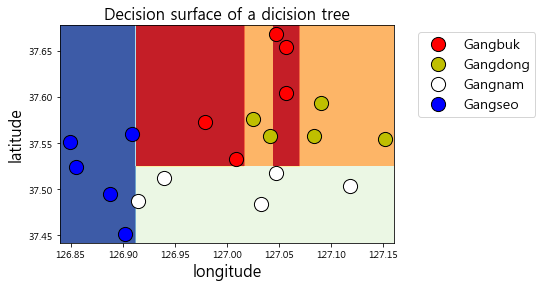

In [76]:
display_decision_surface(clf, X_train, y_encode)

    훈련을 보니 정말 완벽하게 나눠놨다. .....
    
    이러면 사실 좋은건 아니다.

In [78]:
# 다시 훈련시키기 
# 옵션을 줘서 훈련시킨다.
clf = DecisionTreeClassifier(random_state = 70, max_depth=4,
                            min_samples_leaf=2, min_samples_split=2).fit(X_train, y_encode)
clf

# min_samples_split  마지막 분리에서 2개 이상될 때만 분리????

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=70, splitter='best')

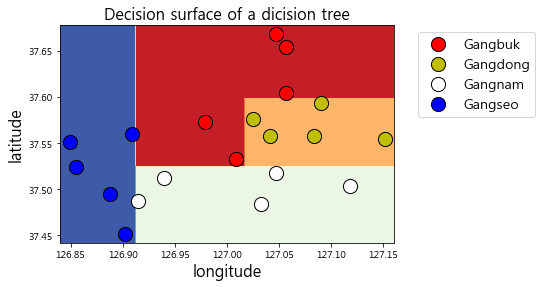

In [79]:
# 다시 시각화
display_decision_surface(clf, X_train, y_encode)

    아까보다 확실히 지역 분류같이 되었다. 
    이렇게 옵션을 줘서 우리가 제한을 시켜야 좀 더 과적합을 막을 수 있다. 

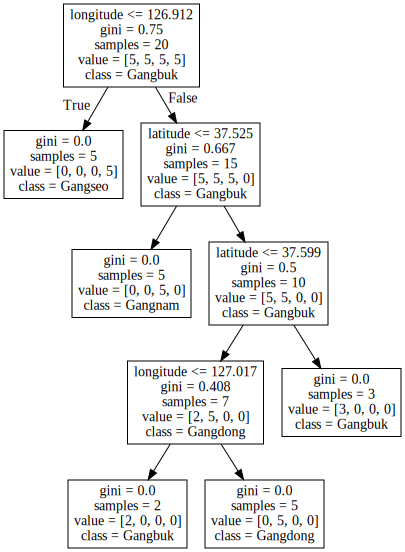

In [80]:
dot_data = export_graphviz(clf, out_file=None, feature_names=["longitude", "latitude"], 
                          class_names=["Gangbuk", "Gangdong", "Gangnam", "Gangseo"])  
#file로 저장하지 않으려면 None을
# feature_names

graph = graphviz.Source(dot_data)
graph.render("seoul")  # 그래프를 그리는 또 다른 함수 
graph

    gini란 불순물 척도이다.
    0에 가까울수록 불순물이 없다. 
    1에 가까울 수록 여러 값들이 섞여있다는 의미이다.

In [82]:
from sklearn.metrics import accuracy_score

pred = clf.predict(X_test)
print("정확도 : ", accuracy_score(y_test.values, le.classes_[pred]))

정확도 :  1.0


# Random Forest

    - 앙상블 기법
        일반적인 사용 기법
        여러개 모델을 동시에 사용해서 그 중 좋은 모델을 선택하는 기법
        
    decision tree 는 어느정도 올라가면 과대 적합이 된다. 
    랜덤포레스트는 어느 수준 이상되면 올라가지 않음. 그래서 decision tree보단 과적합에 안전하다.
    
       
    decision Tree 같은 경우
        - 제일 좋은 질문을 선정해서 초반에 나누기 시작
        
    Random forest Tree의 경우
        - 최초질문이 전체에서 좋은 질문을 선택하는게 아니고 질문이 랜덤이다.
        - 여럿이서 결정하기 때문에 성능이 좋고 정확하다.
        
        random forest를 더 많이 쓴다. 
        
        가지를 몇개까지 칠것인가를 관여하지않는다. 알아서 처리해줌.
        다만 트리를 몇개 만들것인가를 정해줘야한다.
        여기에 중복항목도 들어간다.

In [83]:
from sklearn.ensemble import RandomForestClassifier

In [86]:
# 샘플 - 위에서 사용했던 샘플 사용
X, y= datasets.make_moons(n_samples = 100, noise=0.25, random_state=42) 
#n_samples 데이터 갯수
# noise : 섞여있는 정도

# 분류
X_train, X_test, y_train, y_test= train_test_split(X, y, random_state=0,stratify=y)

In [87]:
# 훈련시키기
forest = RandomForestClassifier(random_state=2, n_estimators=5).fit(X_train, y_train)
#n_estimators : 트리를 몇개 만들것인가.

forest

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=5,
                       n_jobs=None, oob_score=False, random_state=2, verbose=0,
                       warm_start=False)

    옵션이 되게 많다. 

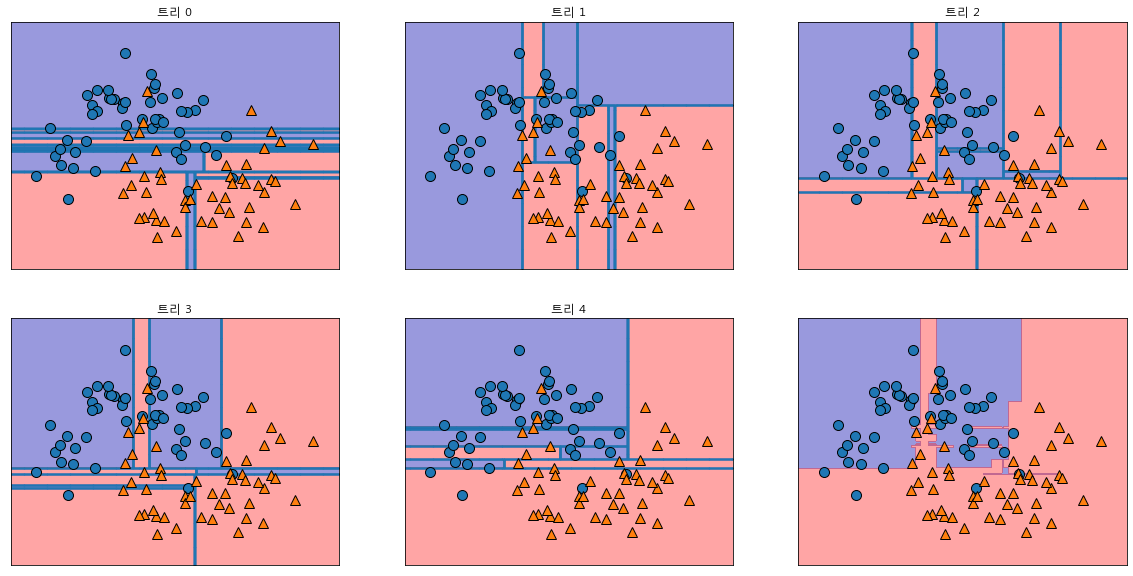

In [88]:
# 시각화 
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
# 2행 3열로 만든다.

#forest.estimators_ 만큼 반복
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("트리 {}".format(i))
    mglearn.plots.plot_tree_partition(X, y, tree, ax=ax)
    #plot_tree_partition 이 부분이 각각의 칸을 만들어주는 기능 
    
mglearn.plots.plot_2d_separator(forest, X, fill=True, ax=axes[-1, -1], alpha=.4)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)




    5개의 트리를 가지고 볼때마다 랜덤으로 만들어진다.
    
    데이터가 계획적으로 공식을 이용하여 가지치는 시스템이 아니다.
    랜덤으로 질문을 통하여 이루어지는 것이다.
    
    여러개의 트리로 만드니까 다양한 관점으로 분석하게 된다.
    그래서 좀 더 정확성을 올릴 수가 있다.
    실제로 수학적으로도 증명된 사실.
    
    decision Tree보다 더 많이 사용하는 이유이다.
    
    

### Random forest의 정확도를 비교해보자 (유방암 데이터로)


In [89]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test= train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)

In [90]:
tree = RandomForestClassifier(random_state=42, n_estimators=100).fit(X_train, y_train)

In [92]:
print("훈련 정확도 : ", tree.score(X_train, y_train))
print("테스트 정확도 : ", tree.score(X_test, y_test))

훈련 정확도 :  1.0
테스트 정확도 :  0.958041958041958


    너무 훈련데이터가 정확해버리기 때문에 난수를 조절해본다

In [96]:
X_train, X_test, y_train, y_test= train_test_split(cancer.data, cancer.target, 
                                                   stratify=cancer.target, random_state=0)

tree = RandomForestClassifier(random_state=0, n_estimators=100).fit(X_train, y_train)
print("훈련 정확도 : ", tree.score(X_train, y_train))
print("테스트 정확도 : ", tree.score(X_test, y_test))

훈련 정확도 :  1.0
테스트 정확도 :  0.972027972027972


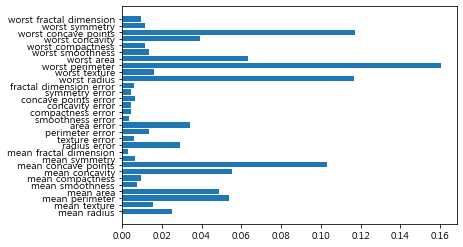

In [97]:
# 영향있는 항목 그래프로 보기
plot_feature_importances_cancer(tree)

    와 아까 위에서 할 때보다 항목의 차이가 상당히 많다.
    
    여러 요소를 통해 훈련하게 하므로 정확성에서 신뢰할 만 하다.

In [107]:
# 대표적인 예시가
# 손글씨 이미지

# 사람들이 입력한 숫자로 자동으로 인식하게 해서 전산처리할려고 

# 사람들 손글씨 이미지 데이터
mnist = datasets.load_digits()
mnist.data.shape #(1797row)
mnist.target  #이미지에 대한 정답들

# '파이썬을 이용한 머신러닝 딥러닝 개발'  p.179 참고로 진행

# 나누어서 담기 
features, labels = mnist.data, mnist.target

    
### 유효성 검사.
    실제로 나중에 머신러닝을 돌리게 되면
    이 과정을 하는게 좋다.
    
    지금까지는 하나의 데이터 덩어리가 있다면  '훈련용', '테스트용'으로 나눴었다.
    
    좀 더 정확한 테스트를 위해, 성능을 위해서 좋은 방법이 있다.
    
    교차검증 (Cross Validation) - 테스트 전에 실행
        교차검증 방식
        k-Folding  : 가장 많이쓰이고 대표적, k번을 접어서 검증
     
    
    그래서 훈련 - 검증(훈련용에서 좋은 결과가 나온 것으로 다시 훈련) - 테스트
    
    k : 5이라면
    
    훈련용을 5번 접는다. 
    접는다는 것은 5개로 구분해서 
    첫번째 구분을 훈련용으로 하고 나머지를 테스트용
    그다음은 2번째를 훈련용으로 나머지를 테스트용... 반복

In [108]:
## 그래서 위에 한 샘플중
# Decision Tree
# Random Tree

#각 경우를 교차 검증을 해본다.

In [111]:
# cross value를 리턴해주는 모듈
from sklearn.model_selection import cross_val_score

# 교차검증 공용 함수
def cross_validation(classifier, features, labels) :
    cv_scores = []  # 반복문으로 여러번 담을것이기 때문
    
    for i in range(10) :
        scores = cross_val_score(classifier, features, labels, cv = 10, scoring= "accuracy") 
        # cv :몇번 교차할건지
        # scoring : 교차점수
        
        cv_scores.append(scores.mean())  #가장 평균값
    
    return cv_scores
    

In [ ]:
# Decision Tree
dt_cv_scores = cross_validation(DecisionTreeClassifier(),features, labels)

# Random Forest
rf_cv_scores = cross_validation(RandomForestClassifier(),features, labels)

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.
  This is separate from the ipykernel package so we can avoid doing imports until


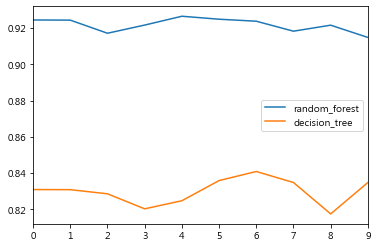

In [117]:
# 선그래프
cv_list = [["random_forest", rf_cv_scores], ["decision_tree", dt_cv_scores]]
df = pd.DataFrame.from_items(cv_list)
# from_items함수

df.head()
df.plot()

    random Tree가 압도적으로 정확성이 높다는게 보인다. 
    

In [119]:
print(np.mean(dt_cv_scores))
print(np.mean(rf_cv_scores))

0.8299408172009576
0.9217991631832938


    10% 가까이 차이가 나는것을 숫자로 확인할 수 있다.

In [ ]:
# 독버섯 데이터이다. 
# https://archive.ics.uci.edu/ml/index.php
# https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data    

In [10]:
# 사이트 주소를 통해 바로 내려받기

import urllib.request as req

savedir = "data/mushrooms.csv"
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data  "
req.urlretrieve(url, savedir)
print("다운로드완료")

다운로드완료


In [11]:
mr = pd.read_csv("data/mushrooms.csv",header = None)
mr.head()
mr.shape

(8124, 23)

In [12]:
mr.isnull().sum()
mr.describe()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [13]:
X = mr.drop(0, axis=1)
y = mr[0]

X.head()
y

0       p
1       e
2       e
3       p
4       e
       ..
8119    e
8120    e
8121    e
8122    p
8123    e
Name: 0, Length: 8124, dtype: object

In [14]:
# 데이터를 숫자화

from sklearn.preprocessing import LabelEncoder

Encoder_X = LabelEncoder()

for col in X.columns :
    X[col] = Encoder_X.fit_transform(X[col])
    
Encoder_y = LabelEncoder()

y = Encoder_y.fit_transform(y)

In [16]:
X.head()
y

array([1, 0, 0, ..., 0, 1, 0])

In [17]:
data_train, data_test, label_train, label_test = train_test_split(X, y)

In [26]:
# 훈련
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
clf = RandomForestClassifier().fit(data_train, label_train)

In [23]:
# 예측
pred = clf.predict(data_test)

In [24]:
from sklearn.metrics import accuracy_score, classification_report

# RandomForest로 했을때 결과 보기
print("정답율 :", accuracy_score(label_test, pred)) # test결과

# 정답율이 1이므로 적합도 검사도해보자
print(classification_report(label_test, pred)) # 적합도도 1이네...ㅎ

정답율 : 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1026
           1       1.00      1.00      1.00      1005

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



In [27]:
# 훈련
clf = DecisionTreeClassifier().fit(data_train, label_train)
# 예측
pred = clf.predict(data_test)
# Decision Tree 로 했을때 결과 보기
print("정답율 :", accuracy_score(label_test, pred)) # test결과

# 정답율이 1이므로 적합도 검사도해보자
print(classification_report(label_test, pred)) # 적합도도 1이네...ㅎ

정답율 : 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1026
           1       1.00      1.00      1.00      1005

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



In [28]:
# KNN으로도 해보자
from sklearn.neighbors import KNeighborsClassifier

# 훈련
clf = KNeighborsClassifier().fit(data_train, label_train)
# 예측
pred = clf.predict(data_test)

# KNN 결과
print("정답율 :", accuracy_score(label_test, pred)) # test결과

# 정답율이 1이므로 적합도 검사도해보자
print(classification_report(label_test, pred)) # 적합도도 1이네...ㅎ # 재미없는 결과..

정답율 : 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1026
           1       1.00      1.00      1.00      1005

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



In [29]:
# 로지스틱 회귀분석으로 해보자
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression().fit(data_train, label_train)

# 예측
pred = clf.predict(data_test)

# 로지스틱 회귀분석 결과
print("정답율 :", accuracy_score(label_test, pred)) # test결과

# 정답율이 1이므로 적합도 검사도해보자
print(classification_report(label_test, pred)) # 적합도도 1이네...ㅎ # 재미없는 결과..

정답율 : 0.9497784342688331
              precision    recall  f1-score   support

           0       0.95      0.96      0.95      1026
           1       0.95      0.94      0.95      1005

    accuracy                           0.95      2031
   macro avg       0.95      0.95      0.95      2031
weighted avg       0.95      0.95      0.95      2031



d:\users\yhs\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
